## Steam Review Sentiment Analysis

Aim ---> Steam game reviews of Sentiment is  positive  or negative .

<h1>Steam Game Reviews </h1>
    <p>The dataset provides a collection of game reviews from the Steam platform, making it suitable for natural language processing (NLP) and machine learning projects.</p>

<h2>Columns Included:</h2>
<ul>
        <li><strong>id:</strong> Unique identifier for the review.</li>
        <li><strong>app_id:</strong> Game identifier on Steam.</li>
        <li><strong>content:</strong> Review text.</li>
        <li><strong>author_id:</strong> Identifier for the review's author.</li>
        <li><strong>is_positive:</strong> Label indicating whether the review is positive (1) or negative (0).</li>
    </ul>

<h1>Potential Use Cases</h1>
    <ul>
        <li><strong>Sentiment Classification:</strong> Determining whether a review is positive or negative.</li>
        <li><strong>Textual Exploration:</strong> Identifying frequently used words in positive or negative reviews.</li>
        <li><strong>Training NLP Models:</strong> Using the dataset to develop and test natural language processing models.</li>
    </ul>

# Import necessary libraries


In [55]:
# Import necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt 
%matplotlib inline

# make with this report 
import pandas_profiling

# gnore all warnings
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")




# columns transformer 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline



# Alogrithim 
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier



# Hyperpearmeter turning 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier


# text preprocessing 
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

## model accuary metrices 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


## dorp the model in pickle 
import pickle



## Load the data

In [56]:
Steam_Review = pd.read_csv("D:\Review Sentiment\data\output.csv")
Steam_Review.head()

,id,app_id,content,author_id,is_positive
0,181331361,100,At least its a counter strike -1/100,76561199556485100,Negative
1,180872601,100,Uh... So far my playthrough has not been great...,76561199230620391,Negative
2,177836246,100,Better mechanics than cs2,76561198417690647,Negative
3,177287444,100,buggy mess and NOT fun to play at all,76561199077268730,Negative
4,176678990,100,"Whoever came up with this, is gonna fucking ge...",76561199104544266,Negative


In [57]:
# from pandas_profiling import ProfileReport  # Ensure you have this library installed


# profile = ProfileReport(Steam_Review, title="Pandas Profiling Report", explorative=True)

# # Generate the report
# profile.to_file("report.html")

In [58]:
# Display column names
print("\nColumn Names:")
print(Steam_Review.columns.tolist())


Column Names:
['id', 'app_id', 'content', 'author_id', 'is_positive']


## Relevant Columns:
content:
<br>
This column contains the text of the review and is the main feature for a sentiment analysis task. It provides the 
<br>
information the model will analyze to predict sentiment.

is_positive:
<br>
This column indicates whether the review sentiment is positive (1) or negative (0). It serves as the target variable for 
the model.

In [59]:
Steam_Review.head()

,id,app_id,content,author_id,is_positive
0,181331361,100,At least its a counter strike -1/100,76561199556485100,Negative
1,180872601,100,Uh... So far my playthrough has not been great...,76561199230620391,Negative
2,177836246,100,Better mechanics than cs2,76561198417690647,Negative
3,177287444,100,buggy mess and NOT fun to play at all,76561199077268730,Negative
4,176678990,100,"Whoever came up with this, is gonna fucking ge...",76561199104544266,Negative


In [60]:
Steam_Review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201151 entries, 0 to 201150
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           201151 non-null  int64 
 1   app_id       201151 non-null  int64 
 2   content      200723 non-null  object
 3   author_id    201151 non-null  int64 
 4   is_positive  201151 non-null  object
dtypes: int64(3), object(2)
memory usage: 7.7+ MB


In [61]:
# Drop unnecessary columns
columns_to_drop = ['id', 'app_id', 'author_id']
Steam_Review = Steam_Review.drop(columns=columns_to_drop)

In [62]:
Steam_Review.head()

,content,is_positive
0,At least its a counter strike -1/100,Negative
1,Uh... So far my playthrough has not been great...,Negative
2,Better mechanics than cs2,Negative
3,buggy mess and NOT fun to play at all,Negative
4,"Whoever came up with this, is gonna fucking ge...",Negative


In [63]:
Steam_Review.shape

(201151, 2)

# Rename specific columns

In [64]:
# Rename specific columns
Steam_Review.rename(columns={'content': 'review_text', 'is_positive': 'sentiment_label'}, inplace=True)

In [65]:
Steam_Review.head(2)

,review_text,sentiment_label
0,At least its a counter strike -1/100,Negative
1,Uh... So far my playthrough has not been great...,Negative


In [66]:
## cheking the shape
Steam_Review.shape

(201151, 2)

In [67]:
## checking info of the data
Steam_Review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201151 entries, 0 to 201150
Data columns (total 2 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   review_text      200723 non-null  object
 1   sentiment_label  201151 non-null  object
dtypes: object(2)
memory usage: 3.1+ MB


In [68]:
## checking the values of the data
null_values = Steam_Review.isnull().sum()

print(f"null values: \n {null_values}")

null values: 
 review_text        428
sentiment_label      0
dtype: int64


# Plot the null values

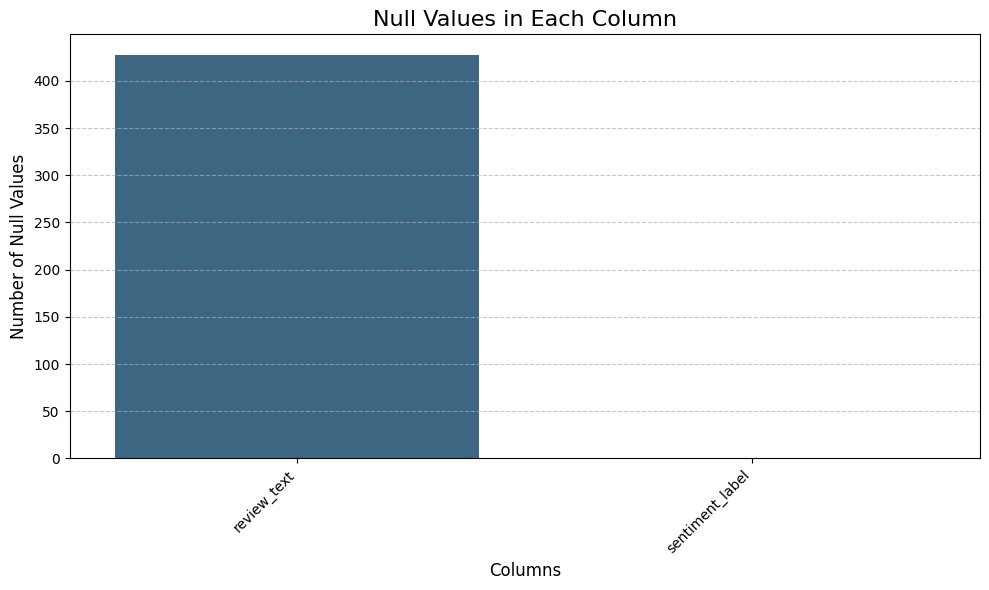

In [69]:

# Plot the null values
plt.figure(figsize=(10, 6))
sns.barplot(x=null_values.index, y=null_values.values, palette='viridis')

# Add plot labels and title
plt.title("Null Values in Each Column", fontsize=16)
plt.xlabel("Columns", fontsize=12)
plt.ylabel("Number of Null Values", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

In [70]:
# Calculate the percentage of null values for each column
null_percentage = (Steam_Review.isnull().sum() / len(Steam_Review)) * 100

# Display the percentages
print("Percentage of Null Values in Each Column:")
print(null_percentage)

Percentage of Null Values in Each Column:
review_text        0.212775
sentiment_label    0.000000
dtype: float64


In [71]:
# Drop rows with any null values
Steam_Review = Steam_Review.dropna()

print(f"Dataset after removing rows with null values: {Steam_Review.shape}")

Dataset after removing rows with null values: (200723, 2)


In [72]:
## checking the values of the data
null_values = Steam_Review.isnull().sum()

print(f"null values: \n {null_values}")

null values: 
 review_text        0
sentiment_label    0
dtype: int64


In [73]:
Steam_Review.head()

,review_text,sentiment_label
0,At least its a counter strike -1/100,Negative
1,Uh... So far my playthrough has not been great...,Negative
2,Better mechanics than cs2,Negative
3,buggy mess and NOT fun to play at all,Negative
4,"Whoever came up with this, is gonna fucking ge...",Negative


In [74]:
# Initialize the LabelEncoder
encoder = LabelEncoder()

# Apply Label Encoding to a categorical column (e.g., 'author_id')
Steam_Review['sentiment_label'] = encoder.fit_transform(Steam_Review['sentiment_label'])

## Apply Label Encoding to the Target Variable (is_positive) Since your is_positive column is already numeric (0 and 1)

In [75]:
Steam_Review.head()

,review_text,sentiment_label
0,At least its a counter strike -1/100,0
1,Uh... So far my playthrough has not been great...,0
2,Better mechanics than cs2,0
3,buggy mess and NOT fun to play at all,0
4,"Whoever came up with this, is gonna fucking ge...",0


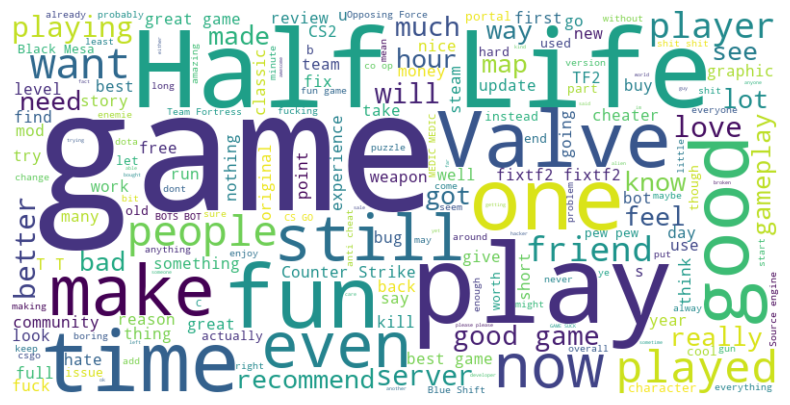

In [76]:
from wordcloud import WordCloud

# Join all the text content into a single string
all_text = ' '.join(Steam_Review['review_text'])

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [77]:
Steam_Review.head()

,review_text,sentiment_label
0,At least its a counter strike -1/100,0
1,Uh... So far my playthrough has not been great...,0
2,Better mechanics than cs2,0
3,buggy mess and NOT fun to play at all,0
4,"Whoever came up with this, is gonna fucking ge...",0


In [86]:
Steam_Review['review_text'][0]

'At least its a counter strike -1/100'

Text data before preprocess

In [27]:
def clean_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove non-alphanumeric characters (punctuation, numbers)
    text = re.sub(r'[^a-z\s]', '', text)

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

Steam_Review['review_text'] = Steam_Review['review_text'].apply(clean_text)


In [28]:
Steam_Review.head()

,review_text,sentiment_label
0,at least its a counter strike,0
1,uh so far my playthrough has not been great gl...,0
2,better mechanics than cs,0
3,buggy mess and not fun to play at all,0
4,whoever came up with this is gonna fucking get...,0


In [29]:
Steam_Review['review_text']

0                             at least its a counter strike
1         uh so far my playthrough has not been great gl...
2                                  better mechanics than cs
3                     buggy mess and not fun to play at all
4         whoever came up with this is gonna fucking get...
                                ...                        
201146                     this trash for sick anime clowns
201147                                    not noob friendly
201148                         total trash for anime clowns
201149    unplayable it keeps trying to update but then ...
201150                                      bring back csgo
Name: review_text, Length: 200723, dtype: object

In [30]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Tokenize
    tokens = word_tokenize(text)
    
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    
    return ' '.join(tokens)

Steam_Review['review_text'] = Steam_Review['review_text'].apply(preprocess_text)


After preprocesses 

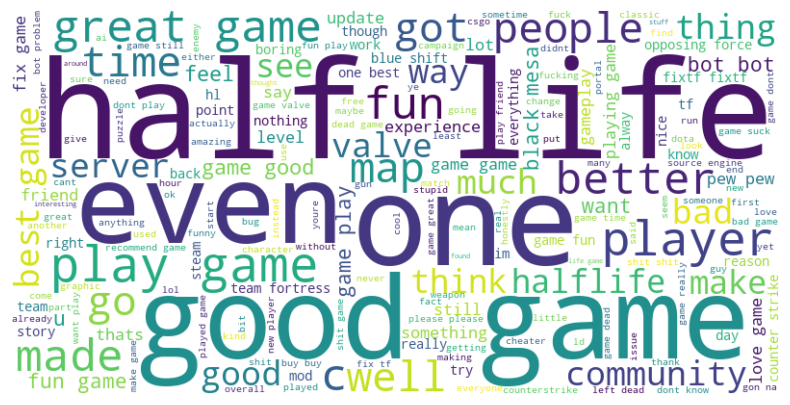

In [31]:
# Join all the text content into a single string
all_text = ' '.join(Steam_Review['review_text'])

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [32]:
Steam_Review.head()

,review_text,sentiment_label
0,least counter strike,0
1,uh far playthrough great glitched texture cont...,0
2,better mechanic c,0
3,buggy mess fun play,0
4,whoever came gon na fucking get negative revie...,0


## Split the Data into Train and Test Sets

In [33]:
X = Steam_Review['review_text']
y = Steam_Review['sentiment_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
print(len(X), len(y))


200723 200723


In [35]:
X.head()

0                                 least counter strike
1    uh far playthrough great glitched texture cont...
2                                    better mechanic c
3                                  buggy mess fun play
4    whoever came gon na fucking get negative revie...
Name: review_text, dtype: object

In [36]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: sentiment_label, dtype: int32

In [37]:
X_train.head()

29403                              bad campaign fun friend
24614       boring linear pseudofps halo pc overrated dull
80744    cheap especially sale pretty short black ops l...
99489    although pretty sparsely populated still prett...
23905                                 borring poo poo game
Name: review_text, dtype: object

In [38]:
X_test.head()

64419                                                  love
78832     nice addition half life short likely hour long...
106914                   love cs theyd proper remake physic
33514                                                zalypa
9687      oh shitits worth itonly salesdont get wrong lo...
Name: review_text, dtype: object

In [39]:
y_train.head()

29403    0
24614    0
80744    1
99489    1
23905    0
Name: sentiment_label, dtype: int32

In [40]:
y_test.head()

64419     1
78832     1
106914    1
33514     0
9687      0
Name: sentiment_label, dtype: int32

In [41]:
# Assuming X_train, X_test, y_train, and y_test are already defined
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}, y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")


X_train shape: (160578,), X_test shape: (40145,), y_train shape: (160578,), y_test shape: (40145,)


In [42]:
text_column = ['review_text']

In [43]:
print(X_train.shape)


(160578,)


Vectorize the Text Data

In [44]:
tfidf = TfidfVectorizer(max_features=5000)  # Limit the number of features

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [45]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = model.predict(X_test_tfidf)

##  Build a Sentiment Analysis Model

In [48]:
def predict_sentiment(review):
    cleaned_review = clean_text(review)
    processed_review = preprocess_text(cleaned_review)
    review_tfidf = tfidf.transform([processed_review])
    prediction = model.predict(review_tfidf)
    
    return "Positive" if prediction == 1 else "Negative"

# Example
new_review = "I love this game! It’s amazing."
print(predict_sentiment(new_review))


Positive


In [49]:
# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))  # For multi-class classification
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.8250591605430315
Precision: 0.8278156405916309
Recall: 0.8250591605430315
F1 Score: 0.8244667149920026

Confusion Matrix:
 [[15169  4487]
 [ 2536 17953]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.77      0.81     19656
           1       0.80      0.88      0.84     20489

    accuracy                           0.83     40145
   macro avg       0.83      0.82      0.82     40145
weighted avg       0.83      0.83      0.82     40145



In [97]:
import os

In [98]:
%pwd

'd:\\Review Sentiment\\notebook'

In [99]:
# Change the directory to 'Review Sentiment'
os.chdir('d:\\Review Sentiment')


In [100]:
%pwd

'd:\\Review Sentiment'

In [101]:
import os

# Ensure the directory exists
os.makedirs('model', exist_ok=True)
# Save the entire model (including the vectorizer)
with open('model/sentiment_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)


with open('model/tfidf_vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(tfidf, vectorizer_file)